In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zTOldBinNewPurity/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewPurity/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewPurity/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_8_006zT06zTOldBinNewPurity/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewPurity/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewPurity/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
print zTbins

[0.06  0.08  0.107 0.142 0.19  0.253 0.337 0.45  0.6  ]


In [3]:
print(dPhi_Bins[ZYAM_Min_i:ZYAM_Max_i+1])
print(delta_phi_centers[ZYAM_Min_i:ZYAM_Max_i])

[0.39269908169872414, 0.5890486225480862, 0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345, 1.5707963267948966]
[0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154]


In [4]:
N_Bins = 8
a = np.geomspace(0.06,0.6,N_Bins+1)
for i in a:
    if (i == a[0]):
        print("[%1.5f,"%(i)),
        continue
    if (i == a[N_Bins]):
        print("%1.5f]"%(i))
        continue
    print("%1.5f,"%(i)),

[0.06000, 0.08001, 0.10670, 0.14228, 0.18974, 0.25302, 0.33740, 0.44994, 0.60000]


**root to numpy**

In [5]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [6]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)
#Plot_UB()

**Pedestal Subtraction**

In [7]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for izt in range(NzT):
        fig = plt.figure(figsize=(8,7))
        #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
        GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
        plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

In [8]:
Ped_Sub_After_Cs(Corrs)

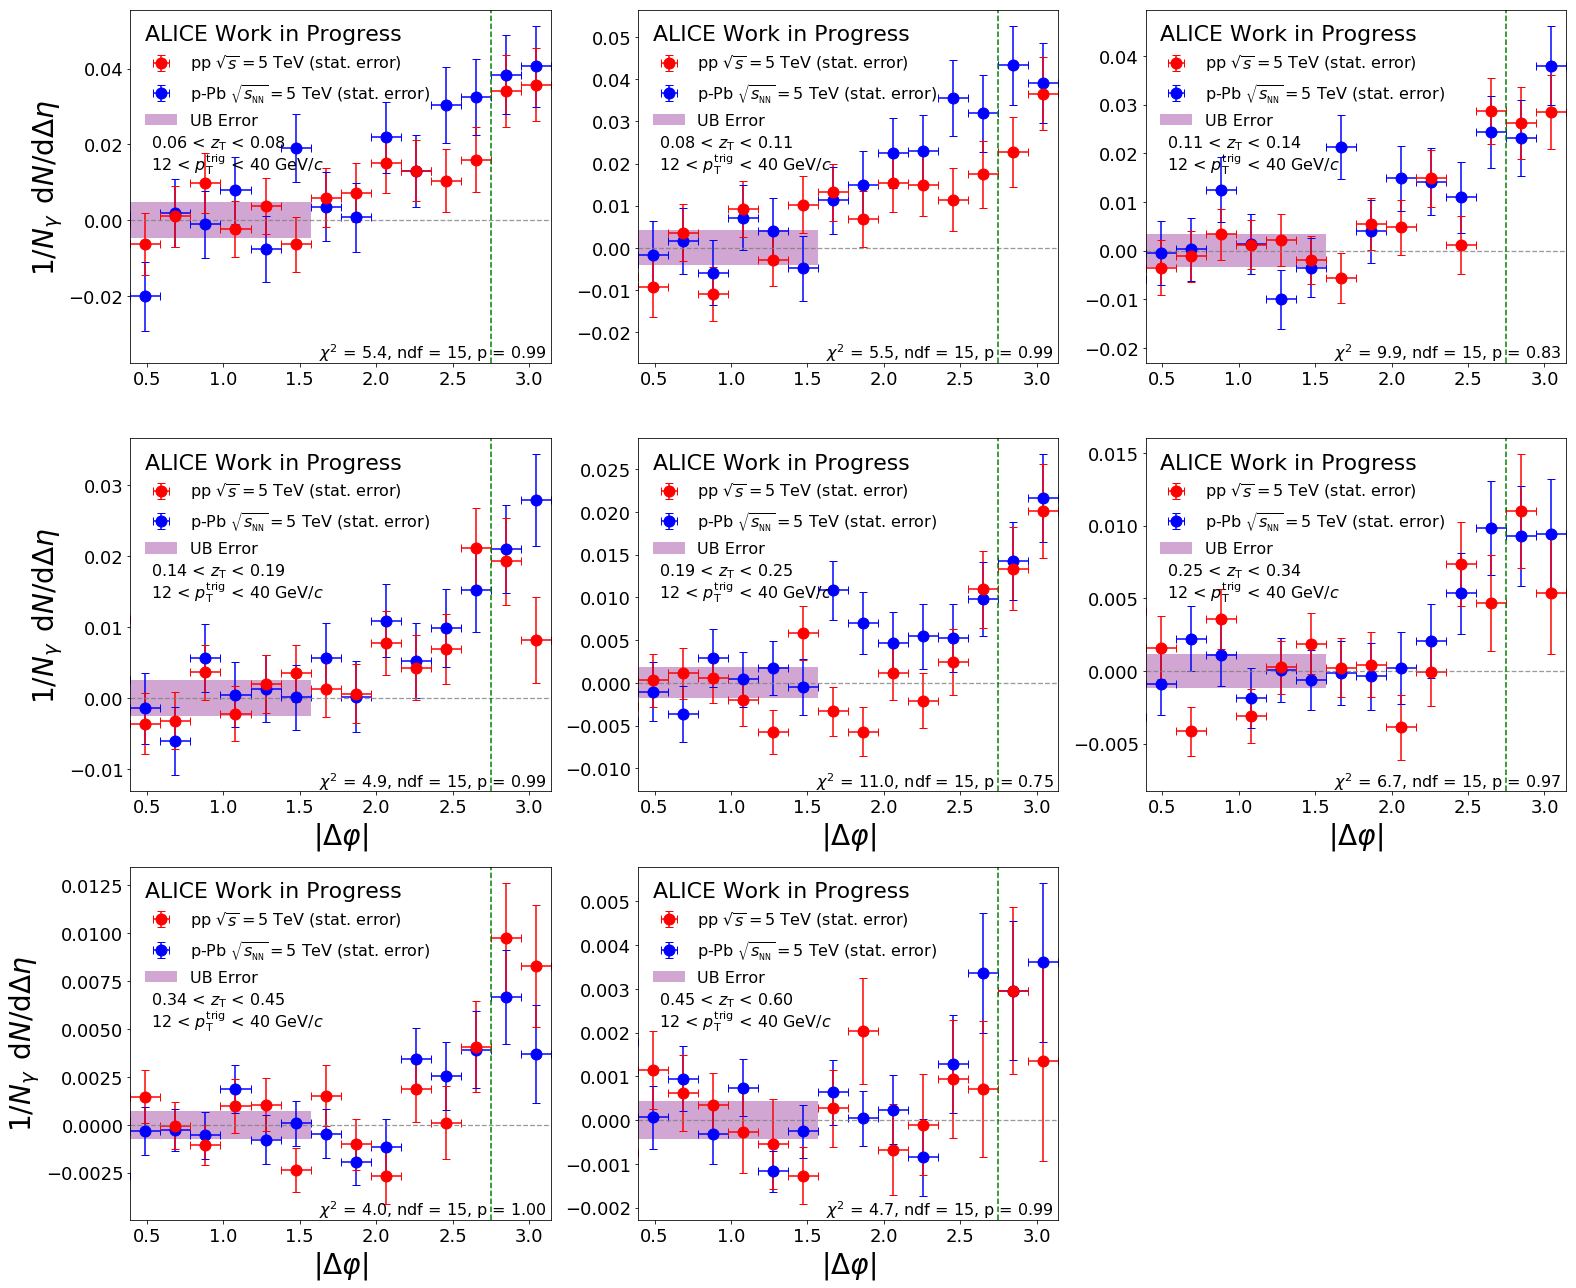

In [9]:
Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [10]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][3][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][3][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]))

Number of Away side bins = 2
[-0.00303355  0.01114263 -0.00365636 -0.00317539  0.00361148 -0.00223812
  0.00200274  0.00345565  0.00121867  0.00059828  0.00778091  0.00428749
  0.0069389   0.02112714  0.01927062  0.00822401]
pp
0.070014 +\- 0.021953 +\- 0.008409
0.33576952943677607
non-dphi rate 0.010
p-Pb
0.124476 +\- 0.022820 +\- 0.009893
0.19981211678726296
non-dphi rate 0.012


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [11]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [12]:
Frags = Get_Fragmentation(Corrs)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

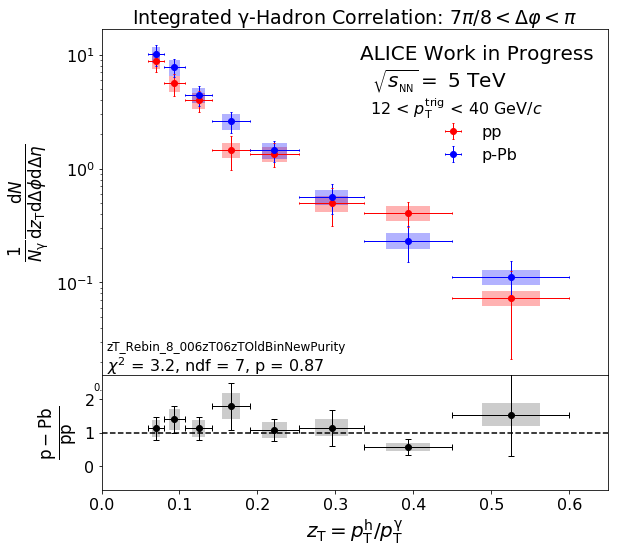

pp_purity_FF_Errors:
1.3109, 0.8249, 0.5868, 0.2149, 0.1992, 0.0730, 0.0599, 0.0108, 

p-Pb_FF_Errors:
2.1159, 1.3962, 0.9053, 0.5182, 0.2965, 0.1636, 0.0832, 0.0420, 

pp_FF:
8.8966, 5.5986, 3.9824, 1.4586, 1.3517, 0.4958, 0.4067, 0.0732, 

pp_FF_Errors:
1.9024, 1.2432, 0.8339, 0.4898, 0.3110, 0.1808, 0.0998, 0.0520, 

p-Pb_FF:
10.0598, 7.7784, 4.4527, 2.5933, 1.4485, 0.5665, 0.2332, 0.1115, 

p-Pb_purity_FF_Errors:
1.4823, 1.1461, 0.6561, 0.3821, 0.2134, 0.0835, 0.0344, 0.0164, 

zT Centers:
0.07, 0.09, 0.12, 0.17, 0.22, 0.30, 0.39, 0.53, 
zT Widths:
0.0100, 0.0135, 0.0175, 0.0240, 0.0315, 0.0420, 0.0565, 0.0750,


In [13]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)
print("zT Centers:")
for izt in zT_centers:
    print("%1.2f,"%(izt)),
print("")
    
print("zT Widths:")
for izt in zT_widths:
    print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

zT_Rebin_8_006zT06zTOldBinNewPurity Intg. 7\pi/8  & $2.08 \pm 0.12$ & 1.12  & $2.22 \pm 0.10$ & 1.19  & $3.20/7\ 0.87 $\\


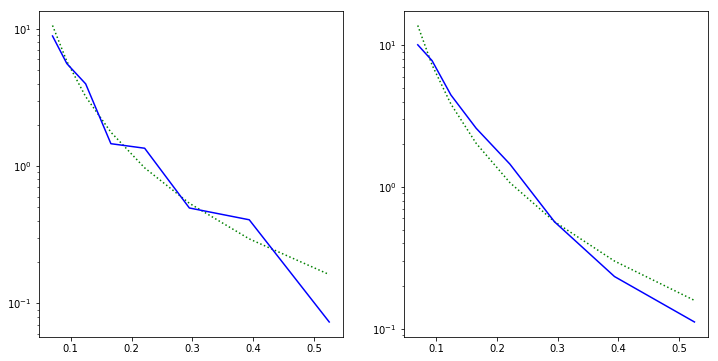

In [14]:
LaTeX_Table(Combined_Frags)

[0.26125019 0.21705156 0.17782176 0.14757794 0.13261747 0.13800368
 0.16171615 0.19725285 0.23940496 0.28525473 0.33327956 0.38266139
 0.43293613 0.4838255  0.5351542  0.58680695 0.63870514 0.69079344
 0.74303189 0.79539089]
1.02110377983


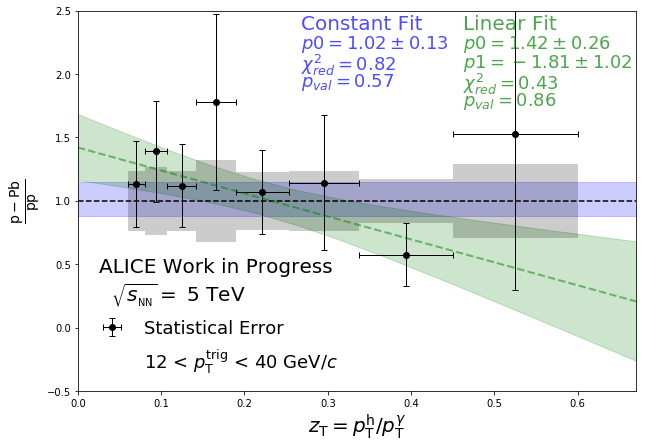

                Central Values:
[1.13074823 1.38936172 1.11810961 1.77786641 1.07157782 1.14267261
 0.57328132 1.52352868]

                Satistical Uncertainty Absolute:
[0.33915559 0.3967138  0.32632034 0.69465693 0.33001004 0.53150327
 0.24816598 1.22491198]

               Relative Satistical Uncertainty:
[0.29993908 0.28553673 0.29185004 0.39072504 0.30796647 0.46514046
 0.43288692 0.80399667]

                Ratio Uncertainty from Purity:
[0.22241849 0.25222934 0.22102694 0.30055678 0.21596481 0.22373767
 0.16984125 0.26852283]

                Ratio Uncertainty from Single Track Efficiency:
[0.07995597 0.09824271 0.07906229 0.12571414 0.07577199 0.08079916
 0.04053711 0.10772975]

                Full Systematic Uncertainty:
[0.23635343 0.27068667 0.23474189 0.32578892 0.22887157 0.23788032
 0.17461188 0.28932716]

****************************************
Minimizer is Linear
Chi2                      =      5.74034
NDf                       =            7
p0                  

In [15]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

In [16]:
reload(functions_fragmentation)
from functions_fragmentation import *

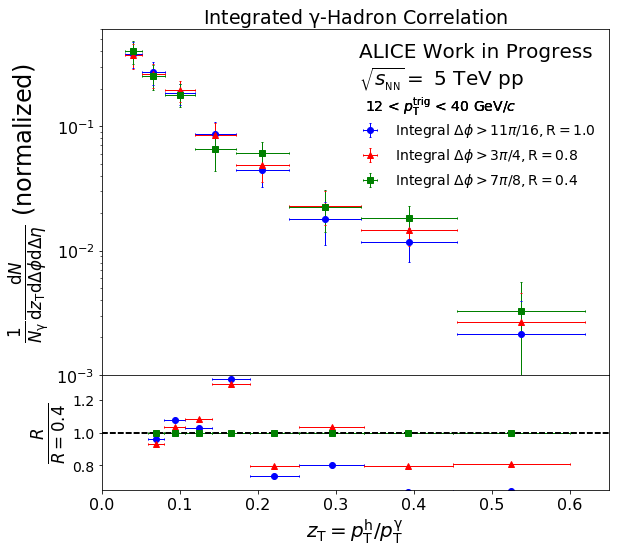

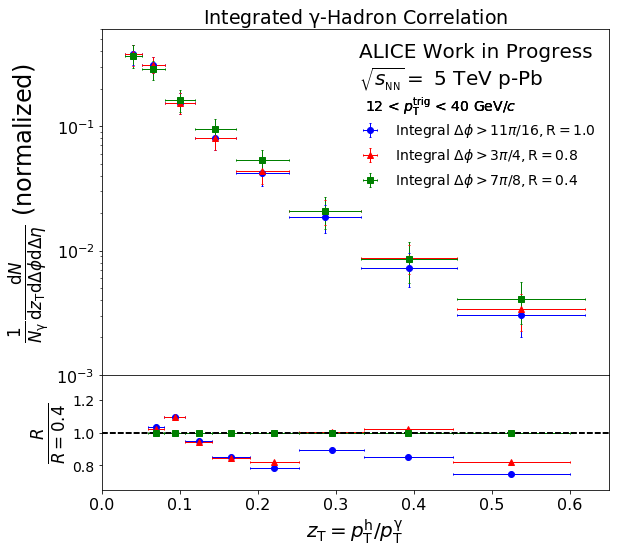

In [17]:
ranges = (1.9,2.15,2.7)
strings = ("11\pi/16, \mathrm{R} = 1.0","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4")

Compare_FF_Integration(ranges,strings)

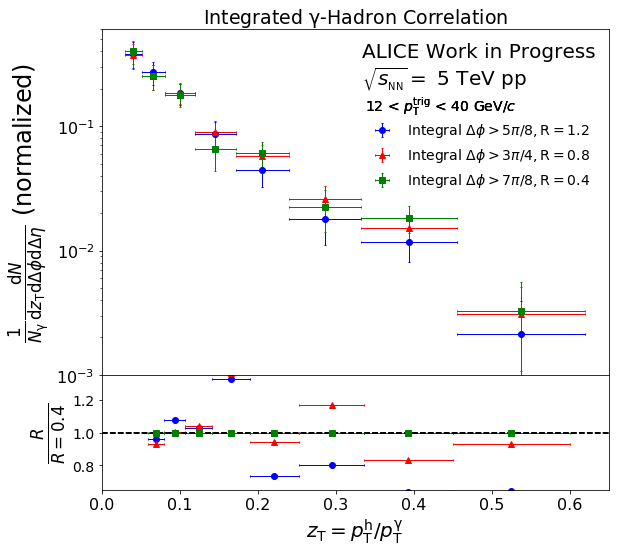

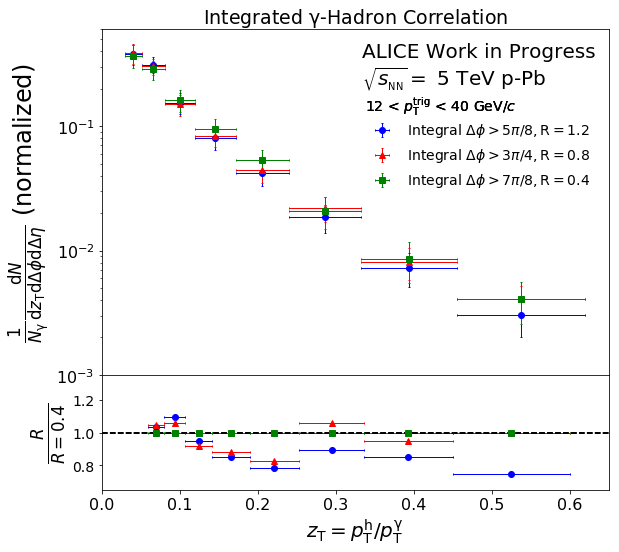

In [18]:
ranges = (1.9,2.3,2.7)
strings = ("5\pi/8, \mathrm{R} = 1.2","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4")

Compare_FF_Integration(ranges,strings)

In [19]:
reload(functions_fragmentation)
from functions_fragmentation import *

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zT_Small_Zyam_Avg
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT_Small_Zyam_Avg.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT_Small_Zyam_Avg.npy


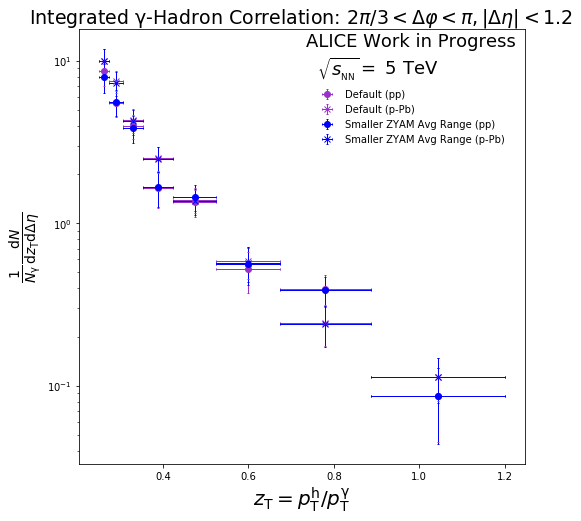

                Central Values:


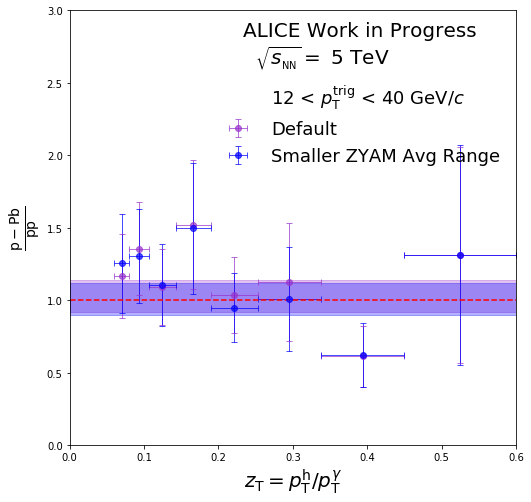

                Central Values:
[1.25447735 1.30212027 1.10274259 1.4968685  0.9471799  1.00968907
 0.62082376 1.30841238]

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      5.93842
NDf                       =            7
p0                        =      1.00803   +/-   0.109698    


In [20]:
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zT_Small_Zyam_Avg"]
string_descriptions = ["Default","Smaller ZYAM Avg Range","9 zT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

zT_Rebin_7_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_9_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy


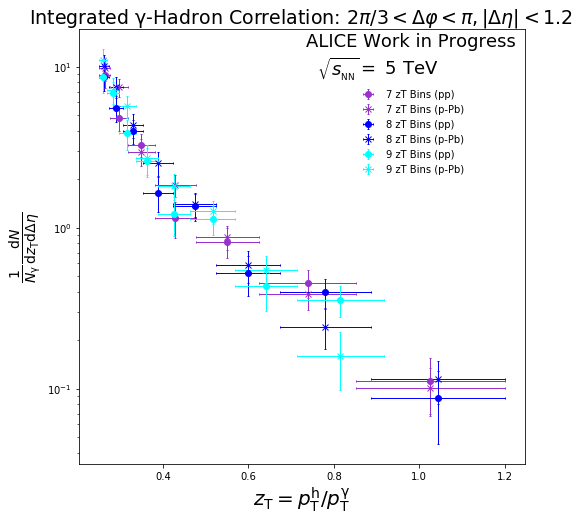

                Central Values:


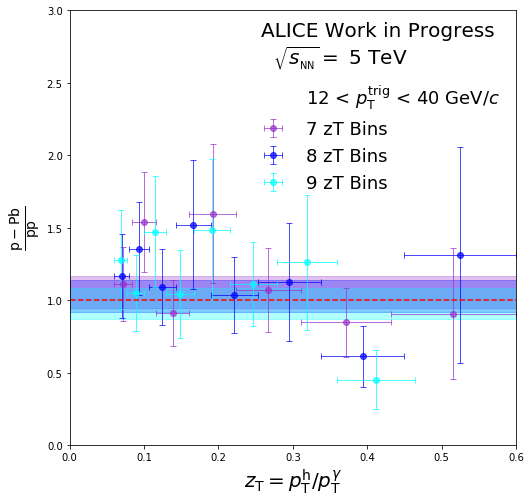

                Central Values:
[1.27896035 1.04748336 1.47293288 1.04031211 1.48675181 1.11300058
 1.26025088 0.45009227 1.04742904]

****************************************
Minimizer is Linear
Chi2                      =      4.59919
NDf                       =            6
p0                        =      1.05873   +/-   0.110663    

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      11.0183
NDf                       =            8
p0                        =     0.978675   +/-   0.106292    


In [21]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

## Compare Different pT Binning

In [22]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

[0.26125019 0.21705156 0.17782176 0.14757794 0.13261747 0.13800368
 0.16171615 0.19725285 0.23940496 0.28525473 0.33327956 0.38266139
 0.43293613 0.4838255  0.5351542  0.58680695 0.63870514 0.69079344
 0.74303189 0.79539089]
1.02110377983


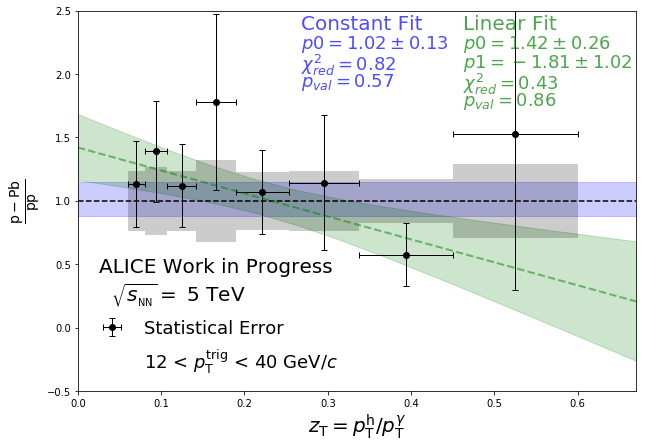

                Central Values:
[1.13074823 1.38936172 1.11810961 1.77786641 1.07157782 1.14267261
 0.57328132 1.52352868]

                Satistical Uncertainty Absolute:
[0.33915559 0.3967138  0.32632034 0.69465693 0.33001004 0.53150327
 0.24816598 1.22491198]

               Relative Satistical Uncertainty:
[0.29993908 0.28553673 0.29185004 0.39072504 0.30796647 0.46514046
 0.43288692 0.80399667]

                Ratio Uncertainty from Purity:
[0.22241849 0.25222934 0.22102694 0.30055678 0.21596481 0.22373767
 0.16984125 0.26852283]

                Ratio Uncertainty from Single Track Efficiency:
[0.07995597 0.09824271 0.07906229 0.12571414 0.07577199 0.08079916
 0.04053711 0.10772975]

                Full Systematic Uncertainty:
[0.23635343 0.27068667 0.23474189 0.32578892 0.22887157 0.23788032
 0.17461188 0.28932716]

****************************************
Minimizer is Linear
Chi2                      =      5.74034
NDf                       =            7
p0                  

In [23]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zTpT2
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpT2.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpT2.npy


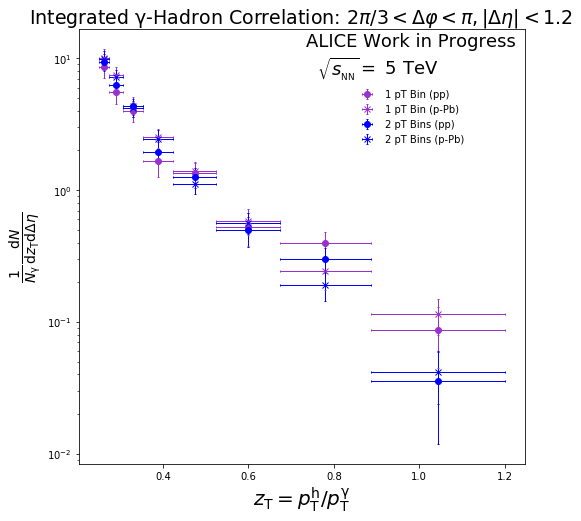

                Central Values:


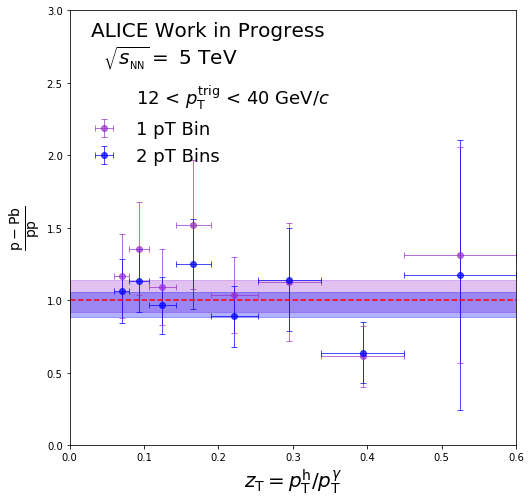

                Central Values:
[1.06243623 1.13544309 0.96307152 1.25018322 0.88824074 1.14142689
 0.6374398  1.17328836]

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      4.50402
NDf                       =            7
p0                        =     0.972113   +/-   0.0870242   


In [24]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

pT_Rebin_1_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
pT_Rebin_1_pDevPlus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
pT_Rebin_1_pDevMinus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
pT_Rebin_1_90p
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy


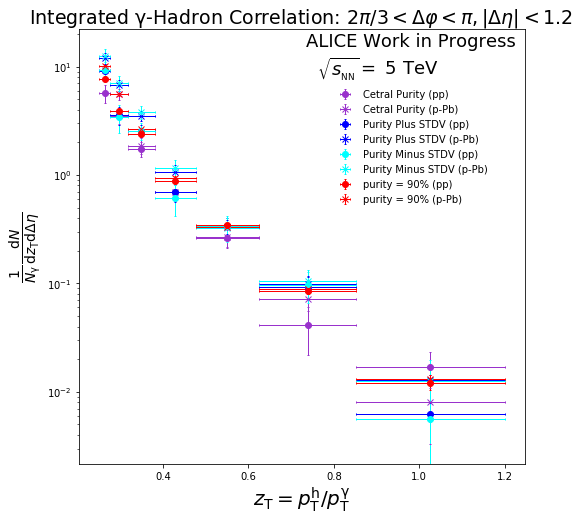

                Central Values:


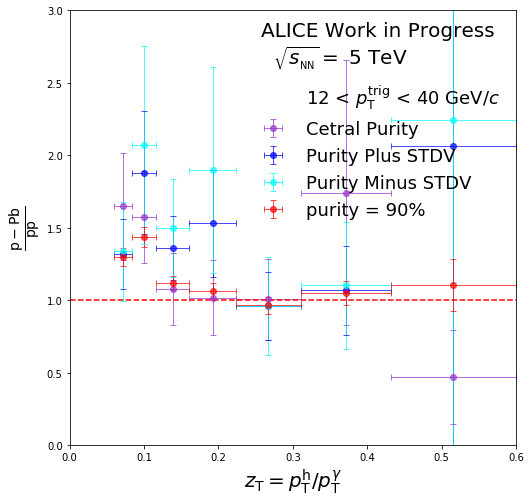

                Central Values:
[1.29867451 1.43467071 1.11537355 1.0607137  0.96336133 1.04910989
 1.10430099]

****************************************
Minimizer is Linear
Chi2                      =      8.87214
NDf                       =            6
p0                        =      1.10897   +/-   0.117923    

****************************************
Minimizer is Linear
Chi2                      =      5.03376
NDf                       =            6
p0                        =      1.27169   +/-   0.112121    

****************************************
Minimizer is Linear
Chi2                      =       3.5561
NDf                       =            6
p0                        =      1.32588   +/-   0.168016    

****************************************
Minimizer is Linear
Chi2                      =      37.1655
NDf                       =            6
p0                        =      1.13933   +/-   0.0242047   


In [25]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)

In [26]:
e

NameError: name 'e' is not defined